<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Import-libraries-and-load-the-data" data-toc-modified-id="Import-libraries-and-load-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries and load the data</a></span></li><li><span><a href="#Explore-the-Data" data-toc-modified-id="Explore-the-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Explore the Data</a></span></li><li><span><a href="#Statistical-analysis" data-toc-modified-id="Statistical-analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Statistical analysis</a></span><ul class="toc-item"><li><span><a href="#Chi-squared-test-of-independence" data-toc-modified-id="Chi-squared-test-of-independence-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Chi-squared test of independence</a></span></li><li><span><a href="#Bootstrap-Statistics" data-toc-modified-id="Bootstrap-Statistics-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Bootstrap Statistics</a></span></li></ul></li><li><span><a href="#Visualizing-Relationships-Between-Features" data-toc-modified-id="Visualizing-Relationships-Between-Features-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Visualizing Relationships Between Features</a></span><ul class="toc-item"><li><span><a href="#Encoding-categorical-features" data-toc-modified-id="Encoding-categorical-features-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Encoding categorical features</a></span></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Scaling</a></span></li><li><span><a href="#Calculate-the-PCA-transformation" data-toc-modified-id="Calculate-the-PCA-transformation-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Calculate the PCA transformation</a></span><ul class="toc-item"><li><span><a href="#The-first-two-components-seem-to-account-for-about-40%-of-the-variance,-and-the-first-five-for-over-70%." data-toc-modified-id="The-first-two-components-seem-to-account-for-about-40%-of-the-variance,-and-the-first-five-for-over-70%.-1.4.3.1"><span class="toc-item-num">1.4.3.1&nbsp;&nbsp;</span><strong>The first two components seem to account for about 40% of the variance, and the first five for over 70%.</strong></a></span></li></ul></li></ul></li><li><span><a href="#Saving-the-data" data-toc-modified-id="Saving-the-data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Saving the data</a></span></li></ul></li></ul></div>

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is analyzing data sets to summarize their main characteristics such as mean, standard deviation, and count, so on, often with visual methods to discover important features.

 ### Import libraries and load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn

from datetime import datetime, date, timedelta

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file
%matplotlib inline

sns.set_style('whitegrid') 
# plt.style.use('ggplot')
# hide warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./Data/01_cleaned_data.csv')
df.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Age,Children,Days_Enrolled,Age_group
0,5524,Undergrad,single,58138.0,2012-04-09,58,635,88,546,172,...,0,0,0,0,0,1,58,0,997,50-60
1,2174,Undergrad,single,46344.0,2014-08-03,38,11,1,6,2,...,0,0,0,0,0,0,61,2,151,60-70
2,4141,Undergrad,couple,71613.0,2013-08-21,26,426,49,127,111,...,0,0,0,0,0,0,50,0,498,40-50
3,6182,Undergrad,couple,26646.0,2014-10-02,26,11,4,20,10,...,0,0,0,0,0,0,31,1,91,30-40
4,5324,Postgrad,couple,58293.0,2014-01-19,94,173,43,118,46,...,0,0,0,0,0,0,34,1,347,30-40


In [3]:
df.shape

(2152, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152 entries, 0 to 2151
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2152 non-null   int64  
 1   Education            2152 non-null   object 
 2   Marital_Status       2152 non-null   object 
 3   Income               2152 non-null   float64
 4   Dt_Customer          2152 non-null   object 
 5   Recency              2152 non-null   int64  
 6   Wines                2152 non-null   int64  
 7   Fruits               2152 non-null   int64  
 8   Meat                 2152 non-null   int64  
 9   Fish                 2152 non-null   int64  
 10  Sweets               2152 non-null   int64  
 11  Gold                 2152 non-null   int64  
 12  NumDealsPurchases    2152 non-null   int64  
 13  NumWebPurchases      2152 non-null   int64  
 14  NumCatalogPurchases  2152 non-null   int64  
 15  NumStorePurchases    2152 non-null   i

### Explore the Data

In [5]:
df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp6']].corr()


,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp6
NumWebPurchases,1.000000,0.454527,0.542906,-0.005396,0.158447
NumCatalogPurchases,0.454527,1.000000,0.572467,-0.547150,0.240465
NumStorePurchases,0.542906,0.572467,1.000000,-0.443487,0.028675
NumWebVisitsMonth,-0.005396,-0.547150,-0.443487,1.000000,-0.000460
AcceptedCmp6,0.158447,0.240465,0.028675,-0.000460,1.000000


In [6]:
# # the correlation of the web purchases and that between the catalog purchases is higher; aggregate them all as 'total'
df['TotalExpenses'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']
# aggregate the total number of promotion acceptance for each customer (champaign 1-5).
df['TotalAcceptedCmp5'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
# aggregate total number of purchases
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

 - Univariate analysis

In [7]:
df.AcceptedCmp6.value_counts()

0    1824
1     328
Name: AcceptedCmp6, dtype: int64

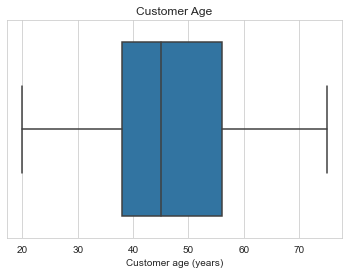

In [8]:
sns.boxplot(df.Age)
plt.xlabel('Customer age (years)')
plt.title('Customer Age');

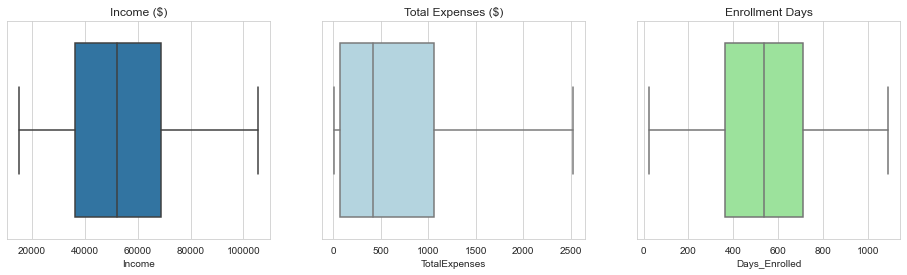

In [9]:
f, axs = plt.subplots(1,3, figsize=(16,4))

_ = plt.subplot(1,3,1)
_= sns.boxplot(df.Income)
_ = plt.title('Income ($)')

_ = plt.subplot(1,3,2)
_= sns.boxplot(df.TotalExpenses, color="lightblue")
_ = plt.title('Total Expenses ($)')

_ = plt.subplot(1,3,3)
_ = sns.boxplot(df.Days_Enrolled, color="lightgreen")
_ = plt.title('Enrollment Days');

 - Target variable 'AcceptedCmp6'

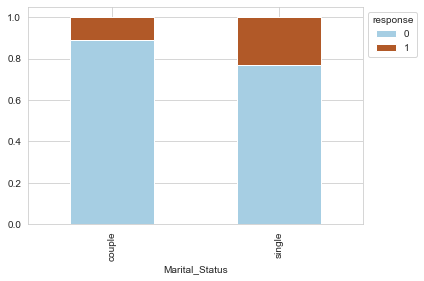

In [10]:
# responses variation with marital status
by_marital = df.groupby('Marital_Status').AcceptedCmp6.value_counts(normalize=True).unstack()
by_marital.plot(kind="bar", stacked=True, cmap="Paired")
plt.legend(title = "response", bbox_to_anchor= (1, 1))
plt.show();
# on average, single people accept the last campaign more often

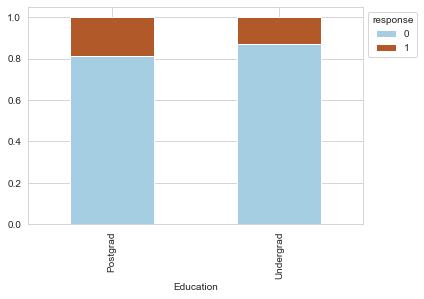

In [11]:
# responses variation with marital status
by_education = df.groupby('Education').AcceptedCmp6.value_counts(normalize=True).unstack()
by_education.plot(kind="bar", stacked=True, cmap="Paired")
plt.legend(title = "response", bbox_to_anchor= (1, 1))
plt.show();
# on average, postgraduate people accept the last campaign more often

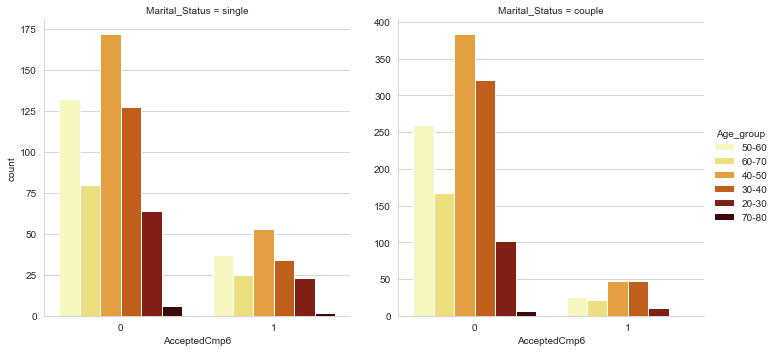

In [12]:
# look at the patterns across age by marital_status 
sns.catplot(x='AcceptedCmp6', hue='Age_group',  col='Marital_Status', data=df, kind="count", 
                estimator=lambda : len(x) / len(df) * 100, sharey=False, palette="afmhot_r");
# very similar between two groups -mid-aged customers

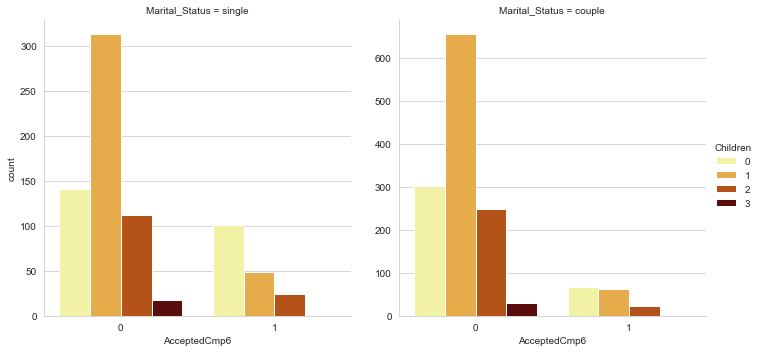

In [13]:
# look at the patterns across #child by marital_status 
sns.catplot(x='AcceptedCmp6', hue='Children',  col='Marital_Status', data=df, kind="count", 
                estimator=lambda : len(x) / len(df) * 100, sharey=False, palette="afmhot_r");
# single customers without child are more responsive

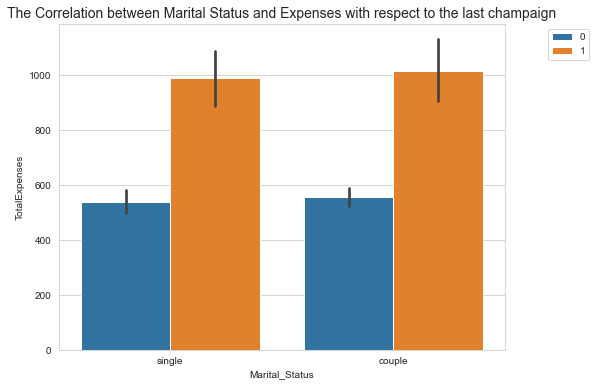

In [14]:
# ANALYSIS OF THE CORRELATION BETWEEN MARITAL STATUS AND TOTAL EXPENSES AND EDUCATION
plt.figure(figsize=(8,6))
sns.barplot(x=df['Marital_Status'], y=df['TotalExpenses'], hue = df["AcceptedCmp6"])
plt.title("The Correlation between Marital Status and Expenses with respect to the last champaign", fontsize=14)
plt.legend(bbox_to_anchor= (1.2, 1))
plt.show();
# observation: no matter signle or couple, customers with more expenses are more active to the last champaign.

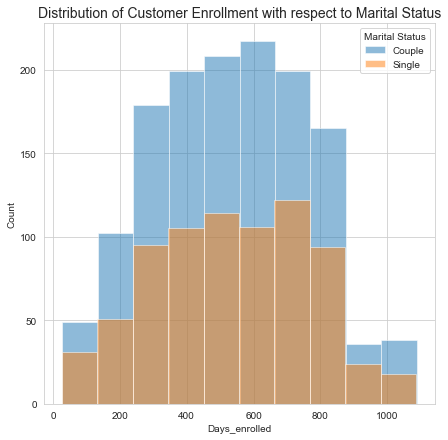

In [15]:
# ANALYSIS OF THE CORRELATION BETWEEN MARITAL STATUS AND TOTAL EXPENSES
plt.figure(figsize=(7,7))
plt.hist("Days_Enrolled", data = df[df["Marital_Status"] == "couple"], alpha = 0.5, label = "Couple")
plt.hist("Days_Enrolled", data = df[df["Marital_Status"] == "single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Customer Enrollment with respect to Marital Status", fontsize=14)
plt.xlabel("Days_enrolled")
plt.legend(title = "Marital Status")
plt.ylabel("Count")
plt.show()
# coupled customers have higher expenses

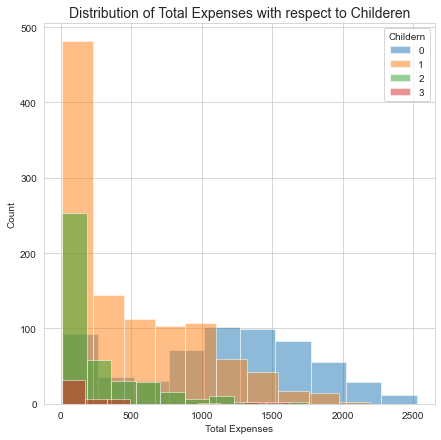

In [16]:
# ANALYSIS OF THE CORRELATION BETWEEN MARITAL STATUS AND TOTAL EXPENSES
plt.figure(figsize=(7,7))
plt.hist("TotalExpenses", data = df[df["Children"] == 0], alpha = 0.5, label = "0")
plt.hist("TotalExpenses", data = df[df["Children"] == 1], alpha = 0.5, label = "1")
plt.hist("TotalExpenses", data = df[df["Children"] == 2], alpha = 0.5, label = "2")
plt.hist("TotalExpenses", data = df[df["Children"] == 3], alpha = 0.5, label = "3")
plt.title("Distribution of Total Expenses with respect to Childeren", fontsize=14)
plt.xlabel("Total Expenses")
plt.ylabel("Count")
plt.legend(title = "Childern")
plt.show()
#observation: customers without child have higher expenses

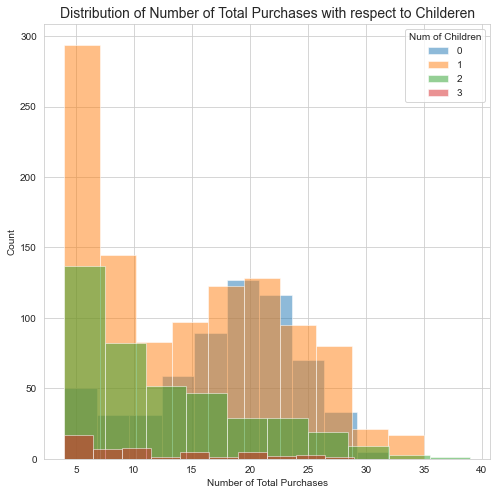

In [17]:
# DISTRIBUTION OF NUMBER OF TOTAL PURCHARSES WITH RESPECT TO CHILDREN
plt.figure(figsize=(8,8))
plt.hist("TotalNumPurchases", data = df[df["Children"] == 0], alpha = 0.5, label = "0")
plt.hist("TotalNumPurchases", data = df[df["Children"] == 1], alpha = 0.5, label = "1")
plt.hist("TotalNumPurchases", data = df[df["Children"] == 2], alpha = 0.5, label = "2")
plt.hist("TotalNumPurchases", data = df[df["Children"] == 3], alpha = 0.5, label = "3")
plt.title("Distribution of Number of Total Purchases with respect to Childeren", fontsize=14)
plt.xlabel("Number of Total Purchases")
plt.ylabel("Count")
plt.legend(title = "Num of Children")
plt.show();
# observation: customers with '1' child have largest number of purchases and customers with '3' childeren the least 

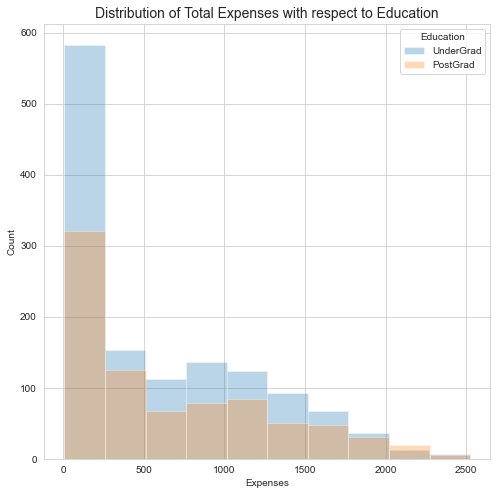

In [18]:
# ANALYSIS OF THE CORRELATION BETWEEN EDUCATION AND TOTAL EXPENSES
plt.figure(figsize=(8,8))
plt.hist("TotalExpenses", data = df[df["Education"] == "Undergrad"], alpha = 0.3, label = "UnderGrad")
plt.hist("TotalExpenses", data = df[df["Education"] == "Postgrad"], alpha = 0.3, label = "PostGrad")
plt.title("Distribution of Total Expenses with respect to Education", fontsize=14)
plt.xlabel("Expenses")
plt.ylabel("Count")
plt.legend(title = "Education")
plt.show();
# observation: most customers with 'undergrad' education have higer expenses

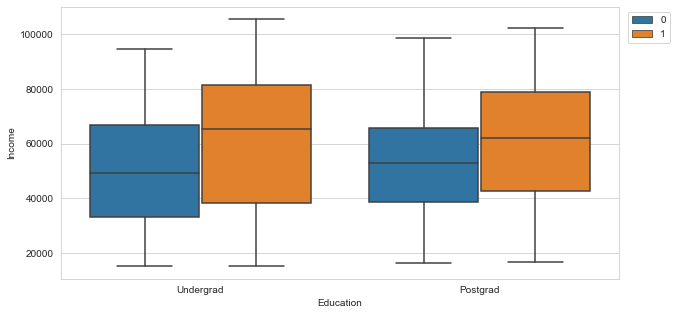

In [19]:
# 'Education' vs 'Income'
plt.subplots(figsize=(10, 5))
sns.boxplot(x='Education', y='Income', hue='AcceptedCmp6', data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Education')
plt.ylabel('Income')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.1,1))
plt.show();
# observation: customers with higher income are more active with responses to the last champaign

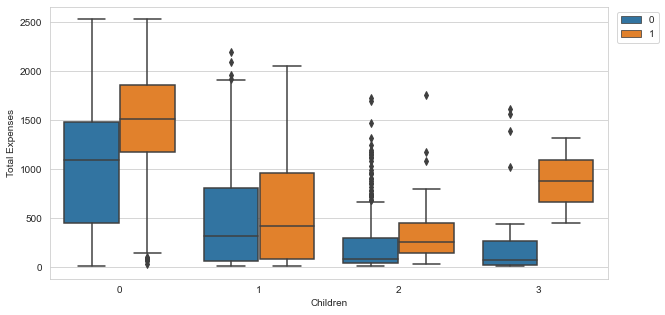

In [20]:
# in this case, family with 3 childern seems not responding to the last champaign
plt.subplots(figsize=(10, 5))
sns.boxplot(x='Children', y='TotalExpenses', hue='AcceptedCmp6', data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Children')
plt.ylabel('Total Expenses')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.1,1))
plt.show();
# observation: cutomers with '0' children are more active with more responses to the last champaign

In [21]:
# use pd.cut() to separate ages into groups
df['Age_group'] = pd.cut(df.Age, [20,30,40,50,60,70,80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

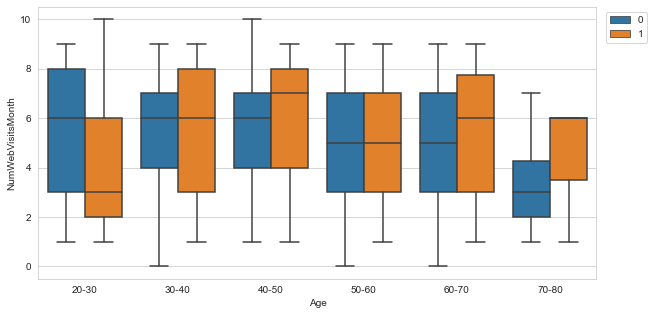

In [22]:
# 'number web visits' ; 
plt.subplots(figsize=(10, 5))
sns.boxplot(x='Age_group', y='NumWebVisitsMonth', hue='AcceptedCmp6', data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Age')
plt.ylabel('NumWebVisitsMonth')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.1,1))
plt.show();
#observation: customers at age 40-50 have most web visits and more responses to the last champaign

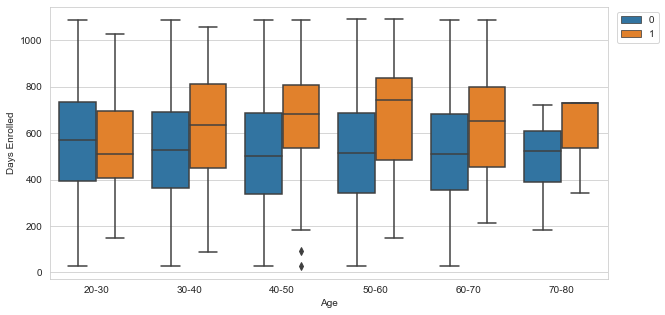

In [23]:
# 'Days enrolled' ; 
plt.subplots(figsize=(10, 5))
sns.boxplot(x='Age_group', y='Days_Enrolled', hue='AcceptedCmp6', data=df)
plt.xticks(rotation='vertical')
plt.xlabel('Age')
plt.ylabel('Days Enrolled')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.1,1))
plt.show();
#observation: customers at with longer enrolled days are more active and have more responses to the last champaign

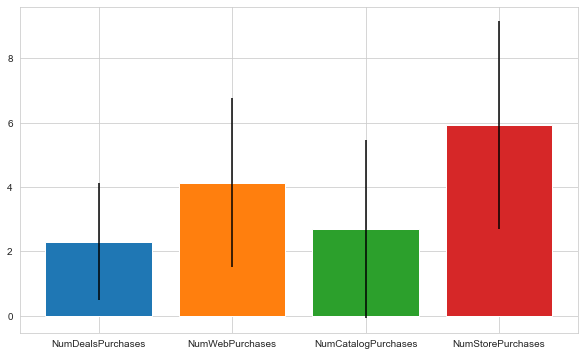

In [24]:
# number of purchases 
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar("NumDealsPurchases", df['NumDealsPurchases'].mean(), yerr=df['NumDealsPurchases'].std())
ax.bar("NumWebPurchases", df['NumWebPurchases'].mean(), yerr=df['NumWebPurchases'].std())
ax.bar("NumCatalogPurchases",df['NumCatalogPurchases'].mean(), yerr=df['NumCatalogPurchases'].std())
ax.bar("NumStorePurchases",df['NumStorePurchases'].mean(), yerr=df['NumStorePurchases'].std())
plt.show(); 
# observation: the number of store purchase is the largest comapre to the others

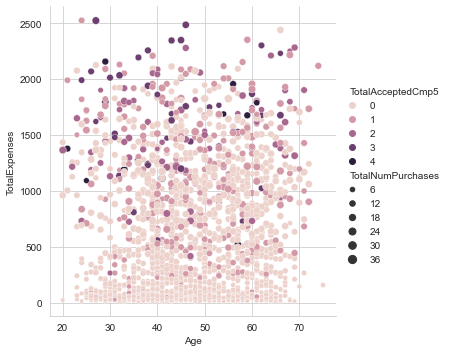

In [25]:
sns.relplot(x='Age', y='TotalExpenses', data=df,
            kind='scatter', size='TotalNumPurchases', hue='TotalAcceptedCmp5');
# customers with more expenses are more active to responde to offers

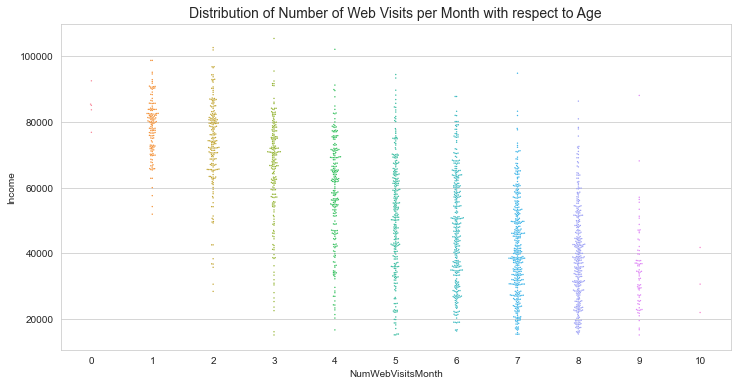

In [26]:
# 'NumWebVisitsMonth'
plt.subplots(figsize=(12, 6))
sns.swarmplot(y='Income', x='NumWebVisitsMonth', data=df, size=1.4)
plt.title("Distribution of Number of Web Visits per Month with respect to Age", fontsize=14);
#observation: customers of age at 40-50 have more web visits

 **The effectiveness of the promotional campaign**

In [27]:
# six champaigns
cmp = ["1st","2nd","3rd","4th","5th","6th"]  
results = [df['AcceptedCmp1'].sum(),df['AcceptedCmp2'].sum(),df['AcceptedCmp3'].sum(),df['AcceptedCmp4'].sum(),df['AcceptedCmp5'].sum(),  df['AcceptedCmp6'].sum()]
perc = [round(x *100 /2078, 2) for x in results]

arr = np.array([cmp, results, perc]).T
df_cmp = pd.DataFrame(arr, columns=['champaign', 'results', 'accpt_rate']).set_index('champaign').astype('float64')
df_cmp
# observation: on average, the last campaign has the highest accepted rate

,results,accpt_rate
champaign,,
1st,142.0,6.83
2nd,30.0,1.44
3rd,158.0,7.60
4th,164.0,7.89
5th,161.0,7.75
6th,328.0,15.78


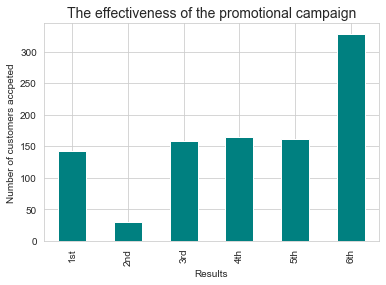

In [28]:
df_cmp['results'].plot(kind='bar', color='teal')
plt.xlabel('Results')
plt.ylabel('Number of customers accpeted')
plt.title('The effectiveness of the promotional campaign', fontsize=14)
plt.show();

### Statistical analysis

In [29]:
df_new = df.copy(deep=True) 

In [30]:
to_drop = ['ID', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Age_group']
df_new.drop(columns=to_drop, inplace=True)

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152 entries, 0 to 2151
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2152 non-null   object 
 1   Marital_Status     2152 non-null   object 
 2   Income             2152 non-null   float64
 3   Complain           2152 non-null   int64  
 4   AcceptedCmp6       2152 non-null   int64  
 5   Age                2152 non-null   int64  
 6   Children           2152 non-null   int64  
 7   Days_Enrolled      2152 non-null   int64  
 8   TotalExpenses      2152 non-null   int64  
 9   TotalAcceptedCmp5  2152 non-null   int64  
 10  TotalNumPurchases  2152 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 185.1+ KB


In [32]:
df_new.head()

,Education,Marital_Status,Income,Complain,AcceptedCmp6,Age,Children,Days_Enrolled,TotalExpenses,TotalAcceptedCmp5,TotalNumPurchases
0,Undergrad,single,58138.0,0,1,58,0,997,1617,0,25
1,Undergrad,single,46344.0,0,0,61,2,151,27,0,6
2,Undergrad,couple,71613.0,0,0,50,0,498,776,0,21
3,Undergrad,couple,26646.0,0,0,31,1,91,53,0,8
4,Postgrad,couple,58293.0,0,0,34,1,347,422,0,19


#### Chi-squared test of independence

 - **Education vs AcceptedCmp6** <br>
     Ho: Education and AcceptedCmp6 is independent <br>
     Ha: Education and AcceptedCmp6 is dependent

In [33]:
# first need contingency table 
data_tst = df_new.copy()
pd.crosstab(data_tst.Education, data_tst.AcceptedCmp6)

AcceptedCmp6,0,1
Education,,
Postgrad,671,157
Undergrad,1153,171


In [34]:
from scipy.stats import chi2_contingency
table = [[671, 157], [1152, 170]]
stat, p, dof, expected = chi2_contingency(table)
print(table)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
from scipy.stats import chi2
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

[[671, 157], [1152, 170]]
dof=1
[[ 702.06697674  125.93302326]
 [1120.93302326  201.06697674]]
probability=0.950, critical=3.841, stat=14.231
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


 - With p < 0.05, I can reject the null hypothesis with 95% confidence. There is a relationship between Education and AcceptedCmp6

- **Marital_Status vs AcceptedCmp6** <br>
     Ho: Marital_Status and AcceptedCmp6 is independent <br>
     Ha: Marital_Status and AcceptedCmp6 is dependent

In [35]:
pd.crosstab(data_tst.Marital_Status, data_tst.AcceptedCmp6)

AcceptedCmp6,0,1
Marital_Status,,
couple,1239,153
single,585,175


In [36]:
from scipy.stats import chi2_contingency
table = [[1239, 153], [585, 175]]
stat, p, dof, expected = chi2_contingency(table)
print(table)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
from scipy.stats import chi2
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

[[1239, 153], [585, 175]]
dof=1
[[1179.83643123  212.16356877]
 [ 644.16356877  115.83643123]]
probability=0.950, critical=3.841, stat=54.189
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


 - With p < 0.05, I can reject the null hypothesis with 95% confidence. There is a relationship between Martial_status and AcceptedCmp6

#### Bootstrap Statistics

I hypothesize that the single response:no_response ratio is larger than the ratio of the couple In order to test this hypothesis, I used bootstrapping techniques to perform 10,000 bootstrap replicates of the difference between single and couple ratios.

To begin this process, I visually inspected the response and no-response counts for both singles and couples, and also the respective ratios. The initial visual scan gives the impression that the single ratio is larger than the couple ratio, but because of a class imbalance I cannot say this with certainty yet.

By drawing 10,000 bootstrap replicates of the difference in single and couple ratios, I was able to simulate a random distribution and thus have confidence in the results.

    Ho: The ratios of single and couple responses are the same 
    Ha: The ratios of single and couple responses are the different 

In [37]:
by_marital_Status = df_new.groupby('Marital_Status').AcceptedCmp6.value_counts()

In [38]:
by_marital_Status

Marital_Status  AcceptedCmp6
couple          0               1239
                1                153
single          0                585
                1                175
Name: AcceptedCmp6, dtype: int64

In [39]:
couple_n = by_marital_Status[0]
couple_y = by_marital_Status[1]
single_n = by_marital_Status[2]
single_y = by_marital_Status[3]

In [40]:
print("Couple no response:", couple_n, "\nCouple responses:", couple_y,
      "\n\nSingle no response:", single_n, "\nSingle responses:", single_y)

Couple no response: 1239 
Couple responses: 153 

Single no response: 585 
Single responses: 175


In [41]:
# can i compare the difference in the ratio to see if its significant?
# ho = the 
single_ratio = single_y / single_n
couple_ratio = couple_y / couple_n
diff_ratio = single_ratio - couple_ratio

print('Single outcome ratio:', single_ratio, "\nCouple outcome ratio:", couple_ratio, "\ndiff_ratio:", diff_ratio)

Single outcome ratio: 0.29914529914529914 
Couple outcome ratio: 0.1234866828087167 
diff_ratio: 0.17565861633658242


In [42]:
marital_counts = df_new.Marital_Status.value_counts()
couple_counts = marital_counts[0]
single_counts = marital_counts[1]

In [43]:
single_response = df_new.loc[df_new['Marital_Status'] == 'single']['AcceptedCmp6']
couple_response = df_new.loc[df_new['Marital_Status'] == 'couple']['AcceptedCmp6']

In [44]:
def draw_reps_ratio(data):
    """Generate bootstrap replicate of 1D data"""
    bs_sample = np.random.choice(data, len(data))
    uniqs, counts = np.unique(bs_sample, return_counts=True)
    freqs = np.asarray((uniqs, counts))
    return freqs[1][1] / freqs[1][0]

In [45]:
# define a function to calculate the test statistic
def diff_between_ratios(single, couple):
    sig = draw_reps_ratio(single)
    cop = draw_reps_ratio(couple)
    return sig - cop

In [46]:
# generate 10,000 replicates of the differences between ratios
np.random.seed(42)
ratio_diffs = [diff_between_ratios(single_response, couple_response) for i in np.arange(10000)]

In [47]:
#calculate the 95% confidence interval of the difference of the outcome ratios
ratio_conf = np.percentile(ratio_diffs, [2.5, 97.5])
ratio_conf

array([0.12380338, 0.23150989])

**Since the 95% confidence interval does not contain 0, and the percentiles are both positive, I can reject the null hypothesis and conclude that singles tend to respond more to the campaign than couples.**

 - The preceding results are plotting in a histogram below, with the 25th and 75th percentiles marked in orange.

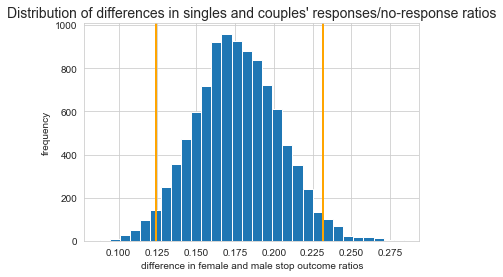

In [48]:
# plot a histogram of these values with the percentiles marked
_ = plt.hist(ratio_diffs, bins=30)
_ = plt.axvline(x=ratio_conf[0], color='orange', linewidth=2)
_ = plt.axvline(x=ratio_conf[1], color='orange', linewidth=2)
_ = plt.xlabel('difference in female and male stop outcome ratios')
_ = plt.ylabel('frequency')
_ = plt.title("Distribution of differences in singles and couples' responses/no-response ratios", fontsize=14)

 - To verify these results, I used the same bootstrapping technique with difference in averages as the test statistic.
        Ho: The difference of single and couple responses is zero 
        Ha: The difference of single and couple responses is not zero 

In [49]:
def draw_bootstrap_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data, len(data))
        bs_replicates[i] = func(bs_sample)
    
    return bs_replicates

In [50]:
# define a function to calculate the test statistic
def diff_between_means(single, couple):
    sig = draw_bootstrap_reps(single, np.mean, size=10000)
    cop = draw_bootstrap_reps(couple, np.mean, size=10000)
    return sig - cop

In [51]:
np.random.seed(42)
mean_diff = [diff_between_means(single_response, couple_response)]

In [52]:
#calculate the 95% confidence interval of the difference of the outcome differences
mean_conf = np.percentile(mean_diff, [2.5, 97.5])
mean_conf

array([0.08661525, 0.15432547])

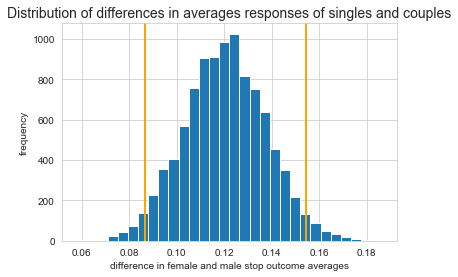

In [53]:
# plot a histogram of these values with the percentiles marked
_ = plt.hist(mean_diff, bins=30)
_ = plt.axvline(x=mean_conf[0], color='orange', linewidth=2)
_ = plt.axvline(x=mean_conf[1], color='orange', linewidth=2)
_ = plt.xlabel('difference in female and male stop outcome averages')
_ = plt.ylabel('frequency')
_ = plt.title('Distribution of differences in averages responses of singles and couples', fontsize=14)

**The results are similar, as seen in the histogram above, the 95% confidence interval does not contain 0, so the difference between the response of singles and couples is significant.**

### Visualizing Relationships Between Features

#### Encoding categorical features

In [54]:
df_encoded = pd.get_dummies(df_new, columns=['Education', 'Marital_Status'], drop_first=True)

In [55]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152 entries, 0 to 2151
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 2152 non-null   float64
 1   Complain               2152 non-null   int64  
 2   AcceptedCmp6           2152 non-null   int64  
 3   Age                    2152 non-null   int64  
 4   Children               2152 non-null   int64  
 5   Days_Enrolled          2152 non-null   int64  
 6   TotalExpenses          2152 non-null   int64  
 7   TotalAcceptedCmp5      2152 non-null   int64  
 8   TotalNumPurchases      2152 non-null   int64  
 9   Education_Undergrad    2152 non-null   uint8  
 10  Marital_Status_single  2152 non-null   uint8  
dtypes: float64(1), int64(8), uint8(2)
memory usage: 155.6 KB


In [56]:
df_encoded.head()

,Income,Complain,AcceptedCmp6,Age,Children,Days_Enrolled,TotalExpenses,TotalAcceptedCmp5,TotalNumPurchases,Education_Undergrad,Marital_Status_single
0,58138.0,0,1,58,0,997,1617,0,25,1,1
1,46344.0,0,0,61,2,151,27,0,6,1,1
2,71613.0,0,0,50,0,498,776,0,21,1,0
3,26646.0,0,0,31,1,91,53,0,8,1,0
4,58293.0,0,0,34,1,347,422,0,19,0,0


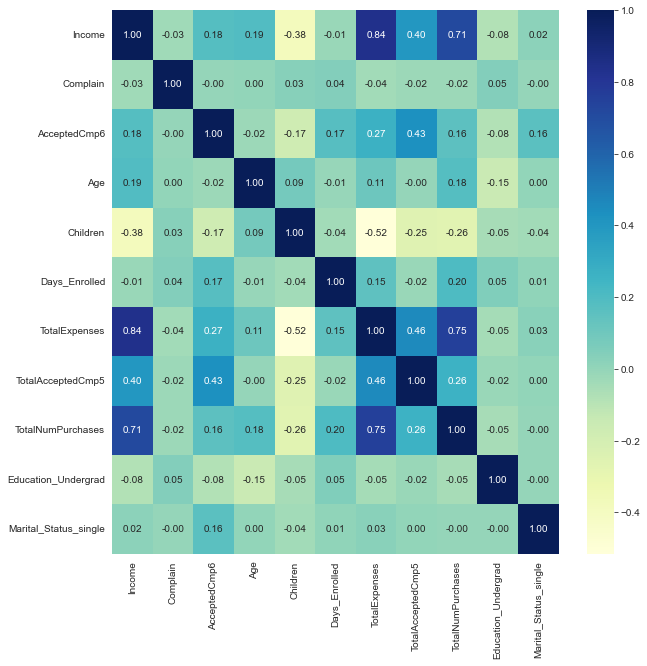

In [57]:
# Make a heatmap of the data checking correlation between features
corr = df_encoded.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True,cmap="YlGnBu", fmt='.2f', annot_kws={"size": 10});  # corr.style.background_gradient(cmap='viridis')

In [58]:
c = corr.abs().unstack().drop_duplicates().reset_index()
c = c.rename(columns={'level_0': 'feature 1', 'level_1': 'feature 2', 0: 'Correlation'})
c = c.query('.25 <= Correlation < 1').sort_values(by = 'Correlation', ascending = False).reset_index(drop=True)
c.style.background_gradient(cmap='Set1_r')
# Some features are more correlated with one another than others.

,feature 1,feature 2,Correlation
0,Income,TotalExpenses,0.837203
1,TotalExpenses,TotalNumPurchases,0.754787
2,Income,TotalNumPurchases,0.711319
3,Children,TotalExpenses,0.515168
4,TotalExpenses,TotalAcceptedCmp5,0.458737
5,AcceptedCmp6,TotalAcceptedCmp5,0.429817
6,Income,TotalAcceptedCmp5,0.396540
7,Income,Children,0.379869
8,AcceptedCmp6,TotalExpenses,0.267594
9,Children,TotalNumPurchases,0.264204


####  Scaling 

In [59]:
#Save the labels & column names
indicies = df_encoded.index
columns = df_encoded.columns

In [60]:
columns

Index(['Income', 'Complain', 'AcceptedCmp6', 'Age', 'Children',
       'Days_Enrolled', 'TotalExpenses', 'TotalAcceptedCmp5',
       'TotalNumPurchases', 'Education_Undergrad', 'Marital_Status_single'],
      dtype='object')

In [61]:
df_encoded_cat = df_encoded[['Education_Undergrad', 'Marital_Status_single']]

In [62]:
#scale the data
encoded_scaled = scale(df_encoded)

In [63]:
#Create a new dataframe from `state_summary_scale` using the column names we saved in `state_summary_columns`
df_scaled = pd.DataFrame(encoded_scaled, columns=columns)
df_scaled.head()

,Income,Complain,AcceptedCmp6,Age,Children,Days_Enrolled,TotalExpenses,TotalAcceptedCmp5,TotalNumPurchases,Education_Undergrad,Marital_Status_single
0,0.278690,-0.096855,2.358172,1.007588,-1.267649,1.989350,1.656195,-0.443485,1.317665,0.790808,1.353358
1,-0.315758,-0.096855,-0.424057,1.265038,1.395094,-1.662860,-0.982789,-0.443485,-1.193835,0.790808,1.353358
2,0.957864,-0.096855,-0.424057,0.321055,-1.267649,-0.164850,0.260355,-0.443485,0.788928,0.790808,-0.738903
3,-1.308587,-0.096855,-0.424057,-1.309461,0.063723,-1.921882,-0.939635,-0.443485,-0.929466,0.790808,-0.738903
4,0.286502,-0.096855,-0.424057,-1.052011,0.063723,-0.816722,-0.327192,-0.443485,0.524560,-1.264529,-0.738903


In [64]:
#scaled data mean = zero
df_scaled.mean().head()

Income          1.669373e-16
Complain        4.697941e-16
AcceptedCmp6    7.168987e-16
Age            -2.787939e-16
Children       -8.171902e-17
dtype: float64

In [65]:
# ddof =0 biased estimate of std (default ddof=1, the best estimate of the population parameter based on the given sample)
# scaled data std =1.0
df_scaled.std(ddof=0).head()

Income          1.0
Complain        1.0
AcceptedCmp6    1.0
Age             1.0
Children        1.0
dtype: float64

In [66]:
df_scaled[['Education_Undergrad', 'Marital_Status_single']] = df_encoded_cat

#### Calculate the PCA transformation

In [67]:
# This technique will find linear combinations of the original features and these new features are uncorrelated with one another and keep maximum amount of variance in the data. The new derived features are in a lower dimension, easy for visualization and exploring how much variance the new features explain and how the original features contribute to these new features.
# Fit the PCA transformation using the scaled data.
model = PCA().fit(df_scaled)

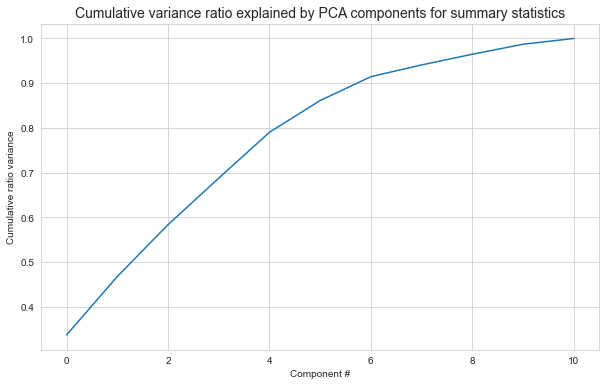

In [68]:
#create a line plot to visualize the cumulative explained variance ratio with number of components
plt.subplots(figsize=(10, 6))
plt.plot(model.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for summary statistics', fontsize=14);

In [69]:
# Apply the transformation to the data to obtain the new derived features.
new_dim_x = model.transform(df_scaled)

In [70]:
new_dim_x.shape

(2152, 11)

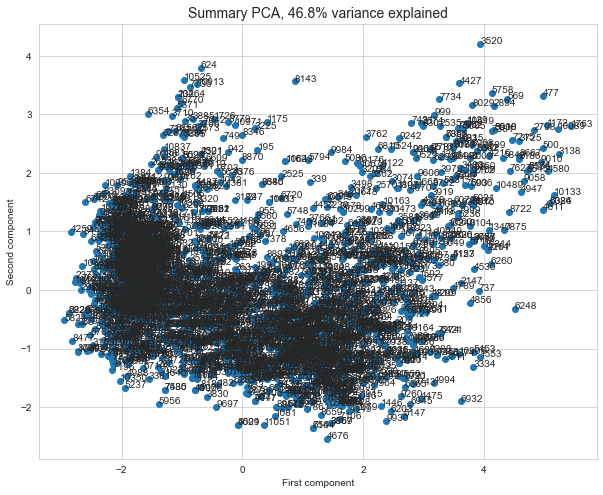

In [71]:
# extract the first and second columns from the transformed data as x and y coordinates for plotting.
# the second (index 1) value of the cumulative variance ratio
# visualizing the percentage variance explained by the two PCA components
x = new_dim_x[:, 0]
y = new_dim_x[:, 1]
customer_id = df['ID']
pc_var = 100 * model.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Summary PCA, {pc_var:.1f}% variance explained', fontsize=14)
for s, x, y in zip(customer_id, x, y):
    plt.annotate(s, (x, y))

In [83]:
##### **The first two components seem to account for about 40% of the variance, and the first five for over 70%.**

In [72]:
df.loc[df['ID'] == 1763]

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp2,Complain,AcceptedCmp6,Age,Children,Days_Enrolled,Age_group,TotalExpenses,TotalAcceptedCmp5,TotalNumPurchases
1434,1763,Undergrad,couple,87679.0,2013-07-27,62,1259,172,815,97,...,0,0,1,27,0,523,20-30,2524,3,29


In [73]:
#Create a dataframe containing the values of the first two PCA components
pca_df = pd.DataFrame({'PC1': new_dim_x[:, 0], 'PC2': new_dim_x[:, 1]}, index=indicies)
pca_df.head()

,PC1,PC2
0,2.684272,0.684470
1,-1.932332,-1.206440
2,1.119618,-0.831697
3,-2.125429,0.618828
4,-0.226570,-0.182715


In [74]:
# concatenate `pca_df` and `Total` along axis 1 ; align on index
pca_df = pd.concat([pca_df, df_scaled['TotalExpenses']], axis=1)

In [75]:
# Quartile is a new data type: category
pca_df['Quartile'] = pd.qcut(pca_df['TotalExpenses'], q=4, precision=1)
pca_df.head()

,PC1,PC2,TotalExpenses,Quartile
0,2.684272,0.684470,1.656195,"(0.7, 3.2]"
1,-1.932332,-1.206440,-0.982789,"(-1.1, -0.9]"
2,1.119618,-0.831697,0.260355,"(-0.3, 0.7]"
3,-2.125429,0.618828,-0.939635,"(-1.1, -0.9]"
4,-0.226570,-0.182715,-0.327192,"(-0.3, 0.7]"


In [76]:
pca_df.dtypes

PC1               float64
PC2               float64
TotalExpenses     float64
Quartile         category
dtype: object

In [77]:
pca_df[pca_df.isnull().any(axis=1)]

,PC1,PC2,TotalExpenses,Quartile


In [78]:
pca_df.TotalExpenses.fillna(pca_df.TotalExpenses.mean(),inplace=True)
#pca_df['Quartile'] = pca_df['Quartile'].cat.add_categories('NA')
#pca_df['Quartile'].fillna('NA', inplace=True)
pca_df['Quartile'].dropna(inplace=True)

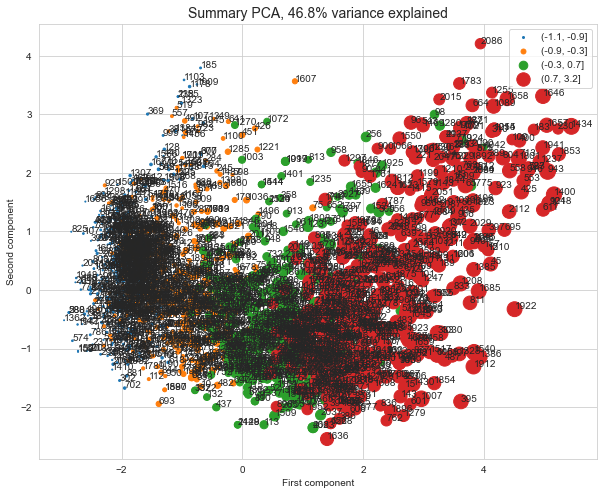

In [79]:
# legend with points coloured by quartile and sized by ''
x = pca_df.PC1
y = pca_df.PC2

quartiles = pca_df.Quartile
customer = pca_df.index
pc_var = 100 * model.explained_variance_ratio_.cumsum()[1]
s = df_new['TotalExpenses']

fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=s[im]*0.1, label=q) # s=s[im] income*0.003

ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
ax.set_title(f'Summary PCA, {pc_var:.1f}% variance explained',fontsize=14)
for s, x, y in zip(customer, x, y):
    plt.annotate(s, (x, y))
plt.show();

**observations:**
- The red points representing the upper quartile of 'TotalExpense' and it spreads across the first dimension (>0). There's also a spread of the other quartiles as well. 
- In this representation, the two principal components account for some 40% of the variance in the data. 

In [80]:
# The components_ attribute of the fitted PCA object tell us how important (and in what direction) each feature contributes to each score
df_components = pd.DataFrame(model.components_, columns=columns)
df_components.head(5)

,Income,Complain,AcceptedCmp6,Age,Children,Days_Enrolled,TotalExpenses,TotalAcceptedCmp5,TotalNumPurchases,Education_Undergrad,Marital_Status_single
0,0.488276,-0.026210,0.233106,0.091338,-0.316753,0.093963,0.524963,0.332904,0.449666,-0.017320,0.012082
1,-0.236098,0.036165,0.560306,-0.582331,-0.194265,0.188506,-0.080242,0.366998,-0.267390,0.045418,0.044008
2,-0.101540,0.474104,0.156805,0.201186,0.236305,0.763281,-0.012264,-0.179671,0.169929,0.003869,0.009485
3,-0.024228,0.066313,0.459709,0.568237,0.400256,-0.286180,-0.132284,0.414361,-0.138725,-0.095561,0.033412
4,0.084883,0.876235,-0.143310,-0.123542,-0.155993,-0.392619,0.029929,0.072435,-0.056451,0.035682,-0.010976


### Saving the data

In [81]:
print("The new dataset has {} rows and {} columns.".format(df_encoded.shape[0], df_encoded.shape[1]))

The new dataset has 2152 rows and 11 columns.


In [82]:
# save the data to a new csv file
datapath = './Data'
save_file(df_encoded, '02_EDA.csv', datapath)
save_file(df_scaled, '02_EDA_scaled.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)N

Please re-run this cell with a new filename.
A file already exists with this name.

Do you want to overwrite? (Y/N)N

Please re-run this cell with a new filename.
